In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Excel file
df = pd.read_excel('M_A_data.xlsx', sheet_name='Data')

In [3]:
# overview
df.head()

,Deal Number,Acquiror Name,Acquiror State,Acquiror Nation,Acquiror SIC2,Acquiror SIC4,Acquiror High Tech Industry,Target Name,Target State,Target Nation,...,Deal Year of Announcement Date,Deal Status,Deal Completed,Deal Value,Deal Price per Share,Deal Target Share Price [T-1],Deal Premium (in %),Cross-border deal,Cross-industry deal,
0,master_deal_no,acq_name,acq_state,acq_nation,acq_sic2,acq_sic4,acq_hightech,tar_name,tar_state,tar_nation,...,deal_year,deal_status,deal_complete,deal_value,deal_price,deal_share,deal_premium,deal_crossborder,deal_crossindustry,
1,118827020,First West Capital Corp,California,United States,60,6021,0,Hotel Investors Trust,California,United States,...,1990,Withdrawn,0,66.769997,5.25,8.25,-36.363636,NaN,NaN,NaN
2,125504020,"Valley National Bancorp,NJ",New Jersey,United States,60,6021,0,Mayflower Financial Corp,California,United States,...,1990,Completed,1,21.209999,17,11,54.545456,NaN,NaN,NaN
3,140363020,Citicorp,New York,United States,60,6021,0,Brookfield Bancshares,Illinois,United States,...,1990,Completed,1,19.84,40.779999,43,-5.162793,NaN,NaN,NaN
4,143183020,"TrustCo Bank Corp,NY",New York,United States,60,6022,0,"National Savings Bank,Albany",New York,United States,...,1990,Withdrawn,0,44.310001,38.130001,28,36.178574,NaN,NaN,NaN


In [4]:
# make row at index 0 the new headers
df.columns = df.iloc[0]

# drop the old header
df = df.drop([0])
df = df.reset_index(drop=True)

In [5]:
# overiew of dataframe after changes
df.head()

,master_deal_no,acq_name,acq_state,acq_nation,acq_sic2,acq_sic4,acq_hightech,tar_name,tar_state,tar_nation,...,deal_year,deal_status,deal_complete,deal_value,deal_price,deal_share,deal_premium,deal_crossborder,deal_crossindustry,
0,118827020,First West Capital Corp,California,United States,60,6021,0,Hotel Investors Trust,California,United States,...,1990,Withdrawn,0,66.769997,5.25,8.25,-36.363636,NaN,NaN,NaN
1,125504020,"Valley National Bancorp,NJ",New Jersey,United States,60,6021,0,Mayflower Financial Corp,California,United States,...,1990,Completed,1,21.209999,17,11,54.545456,NaN,NaN,NaN
2,140363020,Citicorp,New York,United States,60,6021,0,Brookfield Bancshares,Illinois,United States,...,1990,Completed,1,19.84,40.779999,43,-5.162793,NaN,NaN,NaN
3,143183020,"TrustCo Bank Corp,NY",New York,United States,60,6022,0,"National Savings Bank,Albany",New York,United States,...,1990,Withdrawn,0,44.310001,38.130001,28,36.178574,NaN,NaN,NaN
4,143454020,IPCO Corp,New York,United States,50,5048,0,Royal International Optical,Texas,United States,...,1990,Withdrawn,0,87,12.25,9.625,27.272728,NaN,NaN,NaN


In [6]:
# check data types
df.dtypes

0
master_deal_no        object
acq_name              object
acq_state             object
acq_nation            object
acq_sic2              object
acq_sic4              object
acq_hightech          object
tar_name              object
tar_state             object
tar_nation            object
tar_sic2              object
tar_sic4              object
tar_hightech          object
tar_sales             object
tar_ebit              object
tar_ni                object
tar_assets            object
tar_eps               object
deal_date             object
deal_year             object
deal_status           object
deal_complete         object
deal_value            object
deal_price            object
deal_share            object
deal_premium          object
deal_crossborder      object
deal_crossindustry    object
                      object
dtype: object

### Excercise 14

#### 14a) What is the average “Deal premium”

In [7]:
column_name = "deal_premium"

# change data type to float for all rows starting from index 2
df[column_name] = df[column_name].astype(float)

# get mean for Deal Premium in percentages
df[column_name].mean()

33.3606314598331

#### 14b) What is the average deal premium for a high-tech target firm? 

In [8]:
# turn features to numericals
df['tar_hightech'] = df['tar_hightech'].astype(int)

# compute mean only for firms in the high tech industry
df.loc[df['tar_hightech'] == 1, column_name].mean()

37.96077524085723

#### 14c) What is the average deal premium for a non-high-tech target firm?

In [9]:
# turn features to numericals
df['tar_hightech'] = df['tar_hightech'].astype(int)

# compute mean only for firms in the high tech industry
df.loc[df['tar_hightech'] == 0, column_name].mean()

31.319371576171733

#### 14d) What is the average deal premium for cross-border deals? 

In [10]:
# compute mean of deal premium where acquiring nation is not the same as target nation
df.loc[df['acq_nation'] != df['tar_nation'], column_name].mean()

36.52026762388438

#### 14e) What is the average deal premium for domestic deals? 

In [11]:
# compute mean of deal premium where acquiring nation is the same as target nation
df.loc[df['acq_nation'] == df['tar_nation'], column_name].mean()

32.61315729680437

#### 14f) What is the average deal premium for cross-industry deals? 

In [12]:
df.loc[df['acq_sic4'] != df['tar_sic4'], column_name].mean()

33.5751981474247

#### 14g) What is the average deal premium for within-industry deals?

In [13]:
df.loc[df['acq_sic4'] == df['tar_sic4'], column_name].mean()

32.91870651793545

### Excercise 15

In [14]:
### --- for each year from 1986 until 2015 --- ###

# series of counts of the number of deals in years
counts = df['deal_year'].value_counts().sort_index()

# series of sum of deal values by year
sums_deal_values = df.groupby("deal_year")["deal_value"].sum()

# series of average deal value by year
avg_deal_value = df.groupby("deal_year")["deal_value"].mean()

# average deal premium by year
avg_deal_premium = df.groupby("deal_year")["deal_premium"].mean()

# create new dataframe
df_combined = pd.concat([counts, sums_deal_values, avg_deal_value, avg_deal_premium], axis=1)
df_combined.index.name = 'year'
df_combined.columns = ['counts', 'sums_deal_values', 'avg_deal_value', 'avg_deal_premium']
print(df_combined)


      counts sums_deal_values  avg_deal_value  avg_deal_premium
year                                                           
1990     209     76703.775587      379.721661         41.316944
1991     213     41361.535179      196.959691         40.628768
1992     190     47956.731038      257.831887         46.445640
1993     249    106450.791323      454.917912         39.051383
1994     260     91260.548256      362.145033         30.992863
1995     494    273487.466782      561.575907         31.197804
1996     506     352690.14332      702.570007         27.058047
1997     698    549443.069047      788.297086         27.477338
1998     770   1107786.908427     1438.684297         34.374450
1999     994   1866562.201485     1881.615122         33.497525
2000     857   1194774.463067     1394.135896         34.123905
2001     587    478623.532613      816.763708         35.077006
2002     447    239974.097289      536.854804         36.236753
2003     514    231204.600066      449.8

#### 15a) What is the correlation between number of deals in a year and the sum of the deal value? And between the number of deals and the average deal premium in that year?

In [15]:
def cor(c1,c2):
    correlation=df_combined[c1].astype('float64').corr(df_combined[c2].astype('float64'))
    print(correlation)
    plt.plot(df_combined[c1], df_combined[c2], 'o', color='blue')
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()

0.8048035654388531


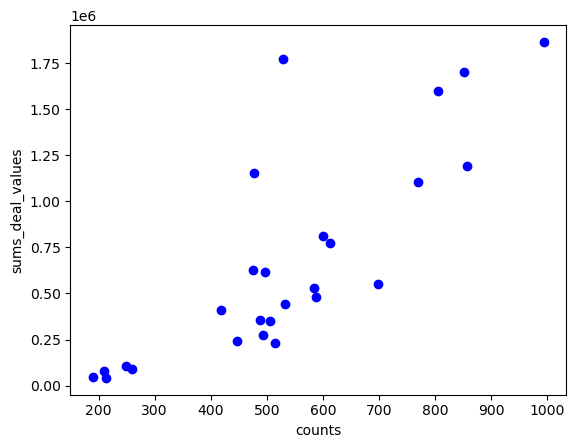

In [16]:
# correlation between between the number of deals and the sum of deals' value in that in the given year
cor('counts','sums_deal_values')

0.5666885627011166


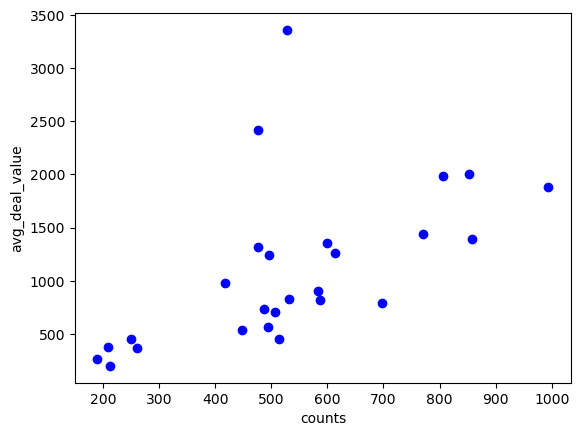

In [17]:
# correlation between number of deals in a year and the avg of the deal value per year
cor('counts','avg_deal_value')

-0.44961849033754125


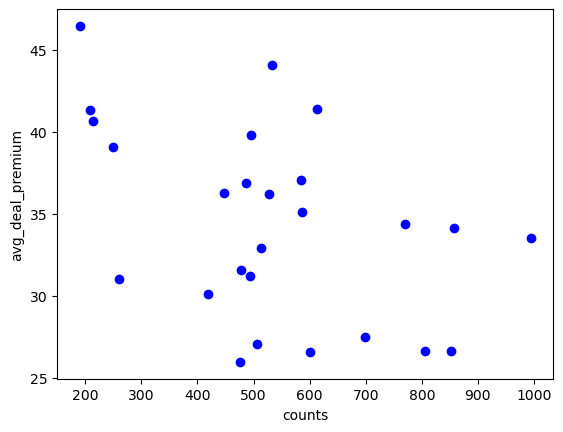

In [18]:
# correlation between number of deals in a year and avg deal premium in % for the given year
cor('counts','avg_deal_premium')


#### 15b)  Based  on  this  information,  do  you  see  direct  evidence  for  M&A  waves?  If  so,  what  drives  the M&A wave: number of deals, size of deals, and/or premiums paid? (max 100 words)

There is a positive correlation between the average number of deal values and the number of deals per year. As the number of deals per year rise so tends to do the average deal value. The average deal premium exhibits a negative correlation to numbers of deals per year, however, visually the values look very scattered. Based on that evidence, one can conclude that the number of deals drive the M&A, however, further analysis is needed to confirm this.

### Excercise 16

### Excercise 17